In [1]:
import os 
import zipfile

### Data Extraction

In [3]:
# Path to the zip file
zip_file_path = 'Dataset-zip\dog-breed-120.zip'

# Path to the dataset folder
dataset_folder = '.\Dataset-org'

# Create the dataset folder if it doesn't exist
os.makedirs(dataset_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_folder)

print(f"Data extracted to {dataset_folder}")

Data extracted to .\Dataset-org


In [5]:
files_list = os.listdir(r"Dataset-org\Dogs class")

# Count the number of files
num_files = len(files_list)
print(num_files)

120


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
# Define the model architecture with Input layer
from tensorflow.keras.layers import Input
import random
from PIL import Image

### Visualization and Label Extraction

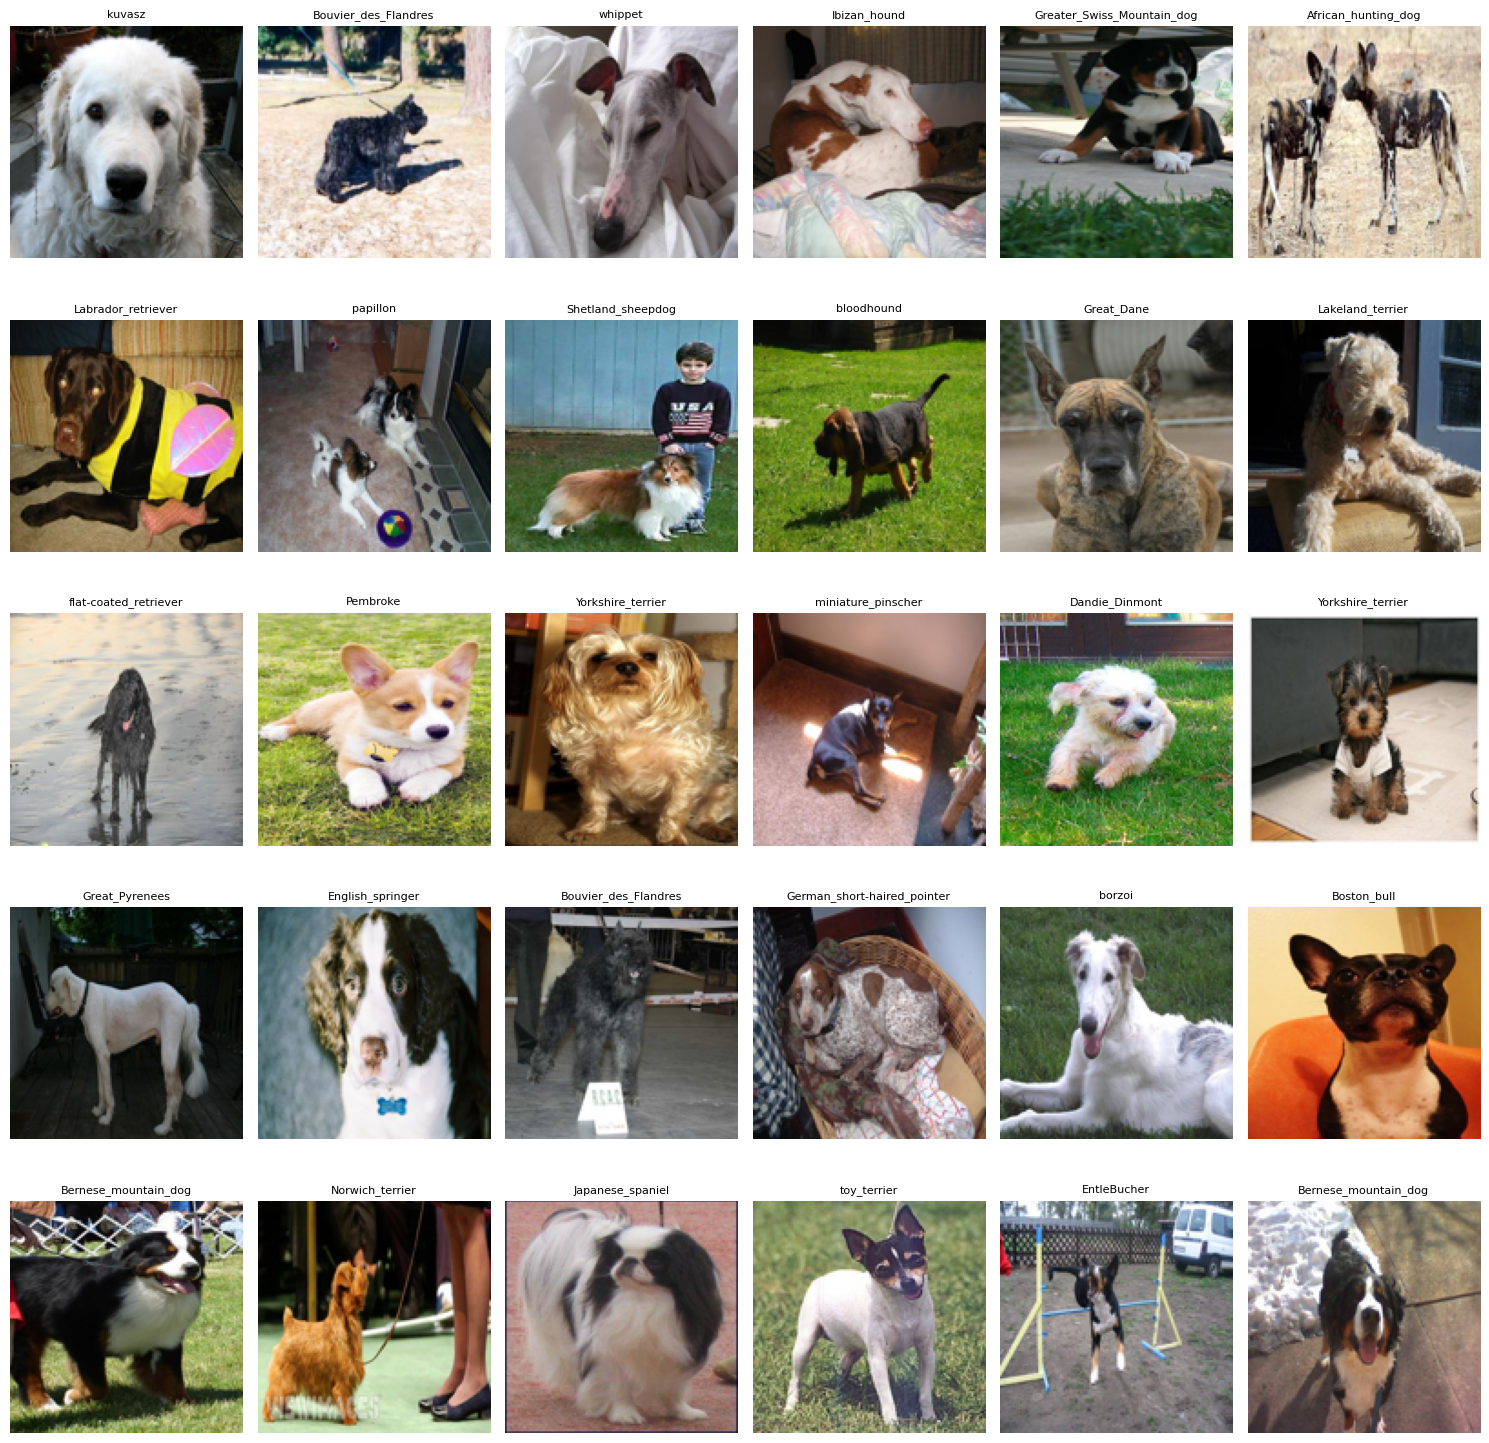

In [15]:
# path to the dataset
dataset_path = "Dataset-org/Dogs_class"

# lists to hold images and labels
image_paths = []
labels = []

# Traverse the dataset directory
for breed_folder in os.listdir(dataset_path):
    breed_folder_path = os.path.join(dataset_path, breed_folder)
    
    if os.path.isdir(breed_folder_path):  # Ensure it's a folder
        # Corrected breed label extraction
        breed_label = "-".join(breed_folder.split("-")[1:])  # Join all parts after the first one
        for img_file in os.listdir(breed_folder_path):
            if img_file.endswith(('png', 'jpg', 'jpeg')):  # Check for image extensions
                image_paths.append(os.path.join(breed_folder_path, img_file))
                labels.append(breed_label)

# Randomly select 30 images
selected_indices = random.sample(range(len(image_paths)), 30)
selected_images = [image_paths[i] for i in selected_indices]
selected_labels = [labels[i] for i in selected_indices]

# Define the fixed image size
fixed_size = (128, 128)

# Visualize the selected images
plt.figure(figsize=(15, 15))
for idx, img_path in enumerate(selected_images):
    plt.subplot(5, 6, idx + 1)  # 5 rows, 6 columns
    img = Image.open(img_path)
    img = img.resize(fixed_size)  # Resize image to 128x128 pixels
    plt.imshow(img)
    plt.title(selected_labels[idx], fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


### Labels and Total number of breeds

In [20]:
import numpy as np

unique_labels = np.unique(labels)
print('Labels:')
print('-------------------------------------------------------------------------')
print(unique_labels)
print('-------------------------------------------------------------------------')
print('total breeds: ',len(unique_labels))
print('-------------------------------------------------------------------------')

Labels:
-------------------------------------------------------------------------
['Afghan_hound' 'African_hunting_dog' 'Airedale'
 'American_Staffordshire_terrier' 'Appenzeller' 'Australian_terrier'
 'Bedlington_terrier' 'Bernese_mountain_dog' 'Blenheim_spaniel'
 'Border_collie' 'Border_terrier' 'Boston_bull' 'Bouvier_des_Flandres'
 'Brabancon_griffon' 'Brittany_spaniel' 'Cardigan'
 'Chesapeake_Bay_retriever' 'Chihuahua' 'Dandie_Dinmont' 'Doberman'
 'English_foxhound' 'English_setter' 'English_springer' 'EntleBucher'
 'Eskimo_dog' 'French_bulldog' 'German_shepherd'
 'German_short-haired_pointer' 'Gordon_setter' 'Great_Dane'
 'Great_Pyrenees' 'Greater_Swiss_Mountain_dog' 'Ibizan_hound'
 'Irish_setter' 'Irish_terrier' 'Irish_water_spaniel' 'Irish_wolfhound'
 'Italian_greyhound' 'Japanese_spaniel' 'Kerry_blue_terrier'
 'Labrador_retriever' 'Lakeland_terrier' 'Leonberg' 'Lhasa' 'Maltese_dog'
 'Mexican_hairless' 'Newfoundland' 'Norfolk_terrier' 'Norwegian_elkhound'
 'Norwich_terrier' 'Old_